In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
def tratar_dados(data_txt):
    data = pd.read_csv(
        data_txt,
        sep="|",
        header=None,
        encoding="utf-8",
        names=["data", "n", "id", "mensagem", "medida"],
    )
    data = data[pd.to_numeric(data["medida"], errors="coerce").notnull()]
    data = data[
        data["mensagem"].isin(
            [
                " 1metros ",
                " 10metros ",
                " 20metros ",
                " 30metros ",
                " 40metros ",
                " 50metros ",
                " 60metros ",
                " 70metros ",
                " 80metros ",
                " 90metros ",
                " 100metros ",
            ]
        )
    ]
    return data


def media_das_medidas(data):
    data["medida"] = data["medida"].astype(str)
    data["medida"] = data["medida"].str.replace(" metros", "")
    data["medida"] = data["medida"].str.replace(" ", "")
    data["medida"] = data["medida"].astype(float)
    data = data["medida"].mean()
    return data


def plot_dados(data):
    mean = media_das_medidas(data)
    sns.histplot(data["medida"], kde=True)
    plt.axvline(mean, color="r", linestyle="--", label=f"Mean: {mean:.2f}")
    plt.legend()
    plt.title(f"Media das medidas: {mean}")
    plt.show()
    return mean


def process(data):
    data = tratar_dados(data)
    mean = plot_dados(data)
    return mean

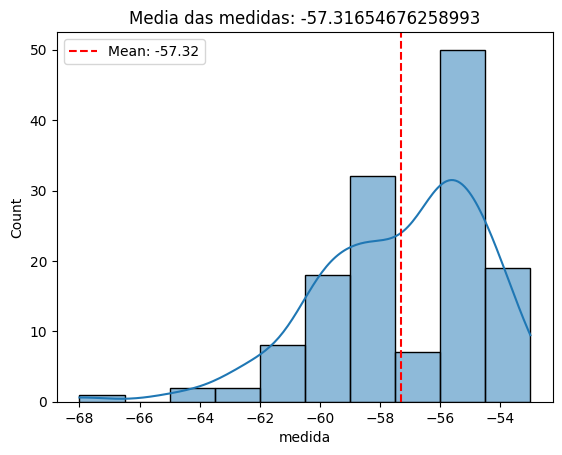

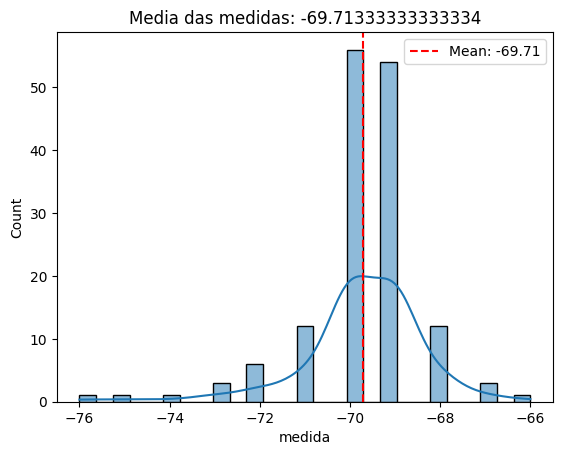

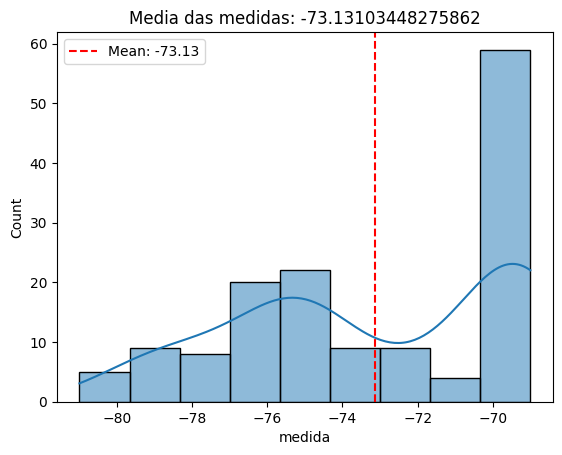

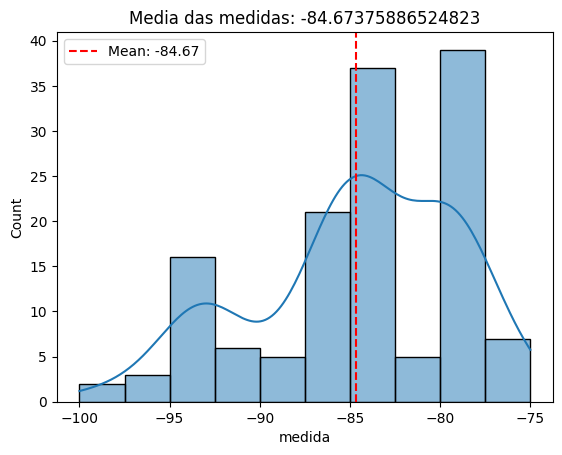

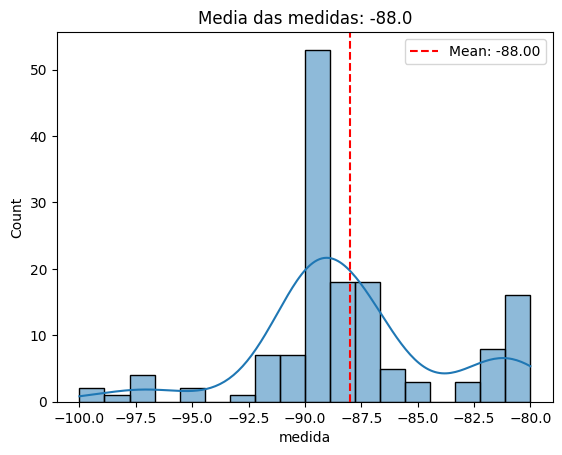

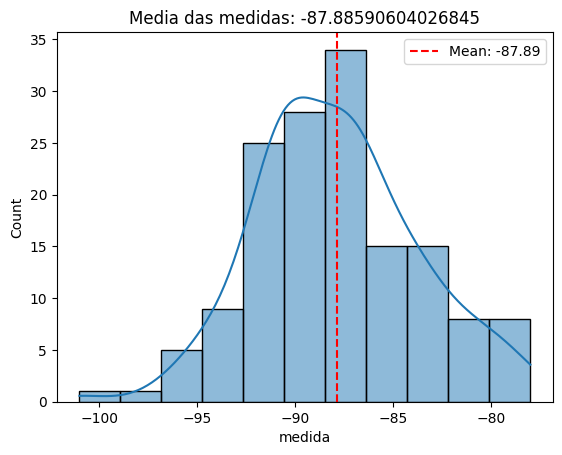

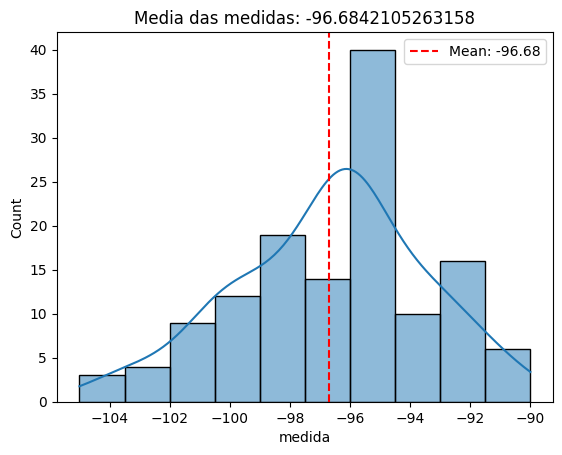

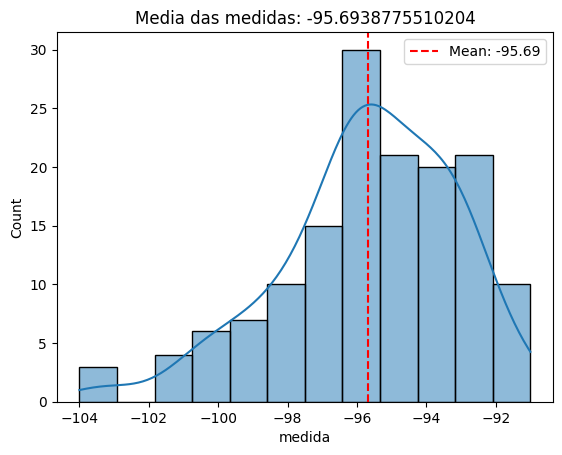

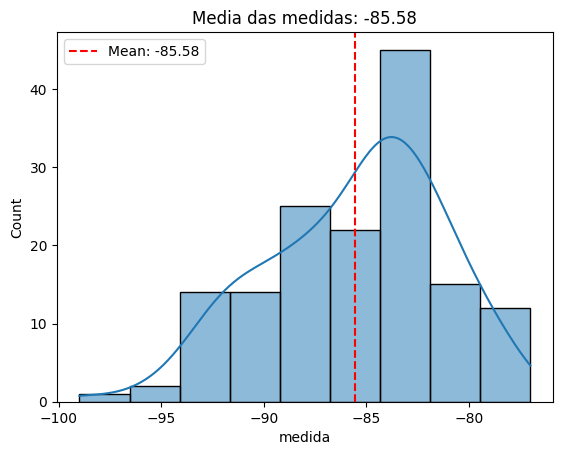

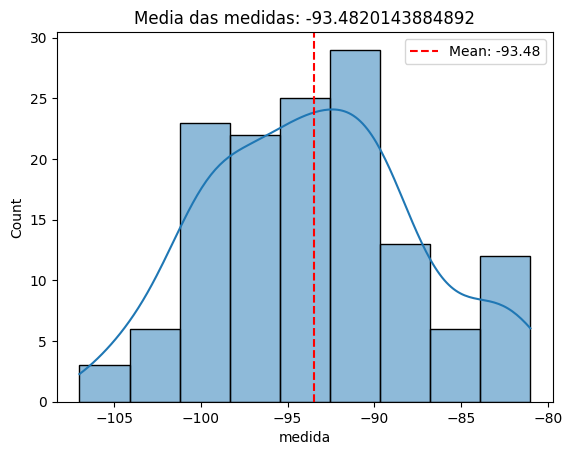

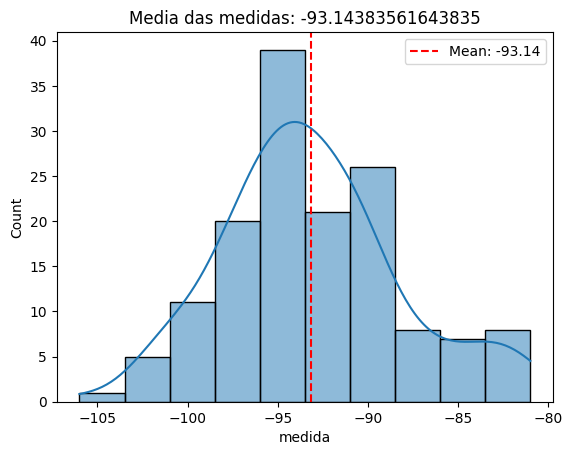

In [5]:
arquivos_medidas = [
    "medida_01m.txt",
    "medida_10m.txt",
    "medida_20m.txt",
    "medida_30m.txt",
    "medida_40m.txt",
    "medida_50m.txt",
    "medida_60m.txt",
    "medida_70m.txt",
    "medida_80m.txt",
    "medida_90m.txt",
    "medida_100m.txt",
]

media_medidas = [process(data) for data in arquivos_medidas]

In [19]:
media_medidas = pd.DataFrame(media_medidas, columns=["Média"])
distancias = np.array([1, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
media_medidas["Distância"] = distancias
media_medidas

,Média,Distância
0,-57.316547,1
1,-69.713333,10
2,-73.131034,20
3,-84.673759,30
4,-88.000000,40
5,-87.885906,50
6,-96.684211,60
7,-95.693878,70
8,-85.580000,80
9,-93.482014,90


In [1]:
def min_quadratic_error(n, distancia, pr_medido, p0):
    pr_modelo = p0 - 10 * n * np.log10(distancia)
    return np.sum((pr_medido - pr_modelo) ** 2)


def plot_line(x, y, m, b):
    plt.plot(x, y, "o")
    plt.plot(x, m * x + b)
    plt.show()